# Instituto Tecnológico de Costa Rica
## Escuela de Ingeniería en Computación
## Inteligencia Artificial

### Primer Proyecto

### Profesor:
- Kenneth Obando Rodríguez

### Estudiantes:
- Alonso Garita Granados 2021030220
- Sophya Mc Lean Morales 2021461577

#### Viernes 26 de abril, I semestre 2024

---


# 1. Entendimiento del negocio

En esta sección describiremos la información referente al negocio para el cual estamos desarrollando este proyecto, StellarCom.
StellarCom Technologies es una empresa líder en el sector de las telecomunicaciones especializada en ofrecer soluciones innovadoras para la conectividad global. Fundada en 2010 por un equipo de visionarios en el campo de la tecnología espacial, StellarCom ha estado a la vanguardia de la revolución de las comunicaciones por satélite.

La empresa desea ampliar sus horizontes, para lo cual quieren incursionar en el mundo de los súper satélites. Desean enviar súper satélites al espacio pero requieren conocer cuántos objetos peligrosos hay para ver si es rentable o no enviar los satélites. 

## 1.1. Objetivo del negocio

Además del objetivo comercial principal, normalmente existen otros abordados también como preguntas comerciales relacionadas que el cliente desea abordar.

### i. Objetivos del negocio
El objetivo principal del negocio de StellarCom es mejorar y expandir sus capacidades de comunicaciones por satélite mediante el lanzamiento de super satélites al espacio. Esto implica mejorar la cobertura, la velocidad y la confiabilidad de los servicios de telecomunicaciones ofrecidos a sus clientes en todo el mundo.

A su vez, con la nueva implementación de super satélites en el espacio, también surgen algunos objetivos específicos:
1. Identificar cómo afectaría el lanzamiento de super satélites al espacio a la percepción de la empresa en el mercado de las telecomunicaciones
2. Evaluar el impacto en la retención y adquisición de clientes como resultado de la nueva iniciativa. 
3. Utilizar los datos recopilados por los super satélites para mejorar y optimizar los servicios existentes de StellarCom.
4. Implementar medidas efectivas para mitigar los riesgos asociados con el lanzamiento y operación de los super satélites.

### ii. Criterios de éxito

1. Lograr una reducción del 20% en el tiempo de latencia de las comunicaciones por satélite en comparación con los niveles anteriores al lanzamiento de los super satélites.
2. Ampliar la cobertura geográfica de los servicios de comunicaciones por satélite en al menos un 10%.
3. Reducir el tiempo de inactividad de los servicios de comunicaciones por satélite en un 25%, garantizando una conexión estable y consistente para los clientes de StellarCom.
4. Obtener un aumento del 15% en los ingresos generados por nuevos servicios.
5. Implementar medidas efectivas para mitigar los riesgos asociados con el lanzamiento y operación de los super satélites, reduciendo la probabilidad de incidentes espaciales en al menos un 20%.

## 1.2. Determinar los objetivos de minería de datos
### i. Objetivos de minería de datos
1. Utilizar los datos de NASA: Asteroids Classification para desarrollar un modelo de clasificación que pueda identificar asteroides cercanos a la Tierra que representen un riesgo potencial para los satélites de StellarCom.
2. Analizar las características y propiedades de los asteroides identificados como potencialmente peligrosos para determinar los factores responsables de su clasificación como tales, proporcionando información detallada sobre su tamaño, velocidad, órbita y otros parámetros relevantes.
### ii. Criterios de éxito 

1. Lograr una precisión del 95% en la clasificación de asteroides como potencialmente peligrosos o no peligrosos, garantizando la fiabilidad del modelo.
2. Analizar las variables de los asteroides que contribuyen a su clasificación como peligrosos, proporcionando a StellarCom información útil sobre los riesgos potenciales asociados con los asteroides.
3. Identificar el mejor modelo para la evaluación continua de riesgos para permitir a StellarCom tomar decisiones informadas sobre la seguridad de sus operaciones.


# 2. Entendimiento de los datos

A continuación se explorarán superficialmente los datos del conjunto para conocer sus atributos y evaluar la completitud y calidad de los datos.

## 2.1. Recopilación y descripción

El conjunto de datos o dataset se tomó de la plataforma Kaggle, puede ver la fuente original del dataset en [este enlace](https://www.kaggle.com/datasets/lovishbansal123/nasa-asteroids-classification). El archivo se llama `nasa.csv` y pesa alrededor de 2.31 MB. El archivo contiene la información de varios objetos cercados a la Tierra (NEO) proveniente de los servicios del CNEOS de la NASA. Para explorar el set de datos se usará la librería Pandas.

In [1]:
#Importamos la librería Pandas
import pandas as pd

# Cargamos el dataset en el CSV en un DataFrame
data = pd.read_csv("nasa.csv")

Primero, conozcamos el tamaño del dataset. En Kaggle se indica que tiene 40 columnas, pero vamos a averiguar la cantidad de filas y columnas del dataset con el que vamos a trabajar. Esta información se guarda en el atributo `shape` del DataFrame.

In [2]:
#.shape da las dimensiones del dataset de la forma (filas, columnas)
dimensiones = data.shape

print("Número de filas:", dimensiones[0], "\nNúmero de columnas:", dimensiones[1] )

Número de filas: 4687 
Número de columnas: 40


Como se pudo comprobar, el dataset tiene 40 columnas y averiguamos que tiene 4687 filas, es decir, 4687 objetos cercanos a la Tierra. Ahora para describir los datos vamos a conocer el nombre de las columnas del dataset y así indagar sobre lo que cada una significa. Para esto accedemos al método `info()` que además de indicar las columnas y el número de entradas (filas), también indica el tipo de dato y la cantidad de registros no nulos de cada columna.

In [3]:
#Información general sobre el dataset, incluyendo el tipo de datos y la cantidad de registros no nulos de cada columna
print("\nInformación general sobre el conjunto de datos:")
print(data.info())


Información general sobre el conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Cl

Dos columnas, `Close Approach Date` y `Orbit Determination Date`, son claramente fechas aunque el tipo inicialmente es `object`. Es importante convertir el tipo de estas columnas al tipo de dato para fecha de Python `datatime`.

In [4]:
#Convertimos el tipo de estas dos columnas a datetime
data['Close Approach Date'] = pd.to_datetime(data['Close Approach Date'])
data['Orbit Determination Date'] = pd.to_datetime(data['Orbit Determination Date'])

#Volvemos a obtener la información del dataset para ver los cambios
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Neo Reference ID              4687 non-null   int64         
 1   Name                          4687 non-null   int64         
 2   Absolute Magnitude            4687 non-null   float64       
 3   Est Dia in KM(min)            4687 non-null   float64       
 4   Est Dia in KM(max)            4687 non-null   float64       
 5   Est Dia in M(min)             4687 non-null   float64       
 6   Est Dia in M(max)             4687 non-null   float64       
 7   Est Dia in Miles(min)         4687 non-null   float64       
 8   Est Dia in Miles(max)         4687 non-null   float64       
 9   Est Dia in Feet(min)          4687 non-null   float64       
 10  Est Dia in Feet(max)          4687 non-null   float64       
 11  Close Approach Date           

Tras conocer las variables e investigar brevemente su significado, vamos a mencionar y explicar las que preliminarmente consideramos como las más importantes, pero eso no significa que se vaya a ignorar el resto de variables.

- `NEO Reference ID` y `Name`: Número de identificación único para cada objeto, es asignado por el CNEOS y se desconoce si se asignan de forma secuencial o no. Lo que se sabe es que cada registro del dataset tiene un valor único en ambas columnas.
- `Est Dia in ...`: Diámetro estimado del objeto en una unidad de medida, kilómetros, metros, millas y pies. Como es un diámetro estimado, hay una estimación mínima (min) y máxima (max).
- `Close Approach Date`: Fecha en la que el objeto tuvo o tendrá su encuentro más cercano con la Tierra.
- `Relative velocity`: Velocidad del objeto en km/s o km/h en el momento del encuentro más cercano
- `Miss Dist.(...)`: Distancia en unidades (UA, distancia lunar, kilómetros o millas) entre el objeto y la Tierra en el momento del encuentro más cercano.
- `Orbit Determination Date`: Fecha en la que se determinó la órbita del objeto.
- `Orbit Uncertainity`: Certeza de la órbita determinada, donde 0 es total certeza de la órbita y 9 es una órbita estimada con alta incertidumbre.
- `Jupiter Tisserand Invariant`: Valor que indica la infuencia del planeta Júpiter en las perturbaciones a la órbita del objeto.
- `Eccentricity`: Indica que tan elíptica es la órbita, donde 0 es una órbita perfectamente circular y 1 una órbita tan elíptica que se reduce a una línea recta.
- `Perihelion Distance`: Distancia más cercana entre el objeto y el Sol.
- `Aphelion Dist`: Distancia más lejana entre el objeto y el Sol.
- `Hazardous`: Indica si el CNEOS ha clasificado el objeto como peligroso o no para la Tierra.

Además, se puede ver que la columna `Non-Null Count` de la tabla indica que para todas las columnas del dataset hay 4687 registros no nulos, que coincide con los 4687 registros en total del dataset y por ende podríamos asegurar que el dataset no tiene registros nulos en ninguna columna. Para afirmar esto, vamos a usar los métodos `isnull()` y `sum()` para contar cuántos registros nulos hay en cada columna.

In [5]:
#Contamos la cantidad de registros nulos por cada columna
print("\nValores nulos por columna:")
print(data.isnull().sum())


Valores nulos por columna:
Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis     

Como todas las columnas nos muestran un valor de 0 registros nulos, podemos afirmar que las columnas de nuestro dataset están completas. Para finalizar con la descripción de los datos, usaremos el método `head()` para observar los primeros 10 registros del dataset. Se aplica una transposición para visualizar mejor los datos.

In [6]:
#Hacemos que Pandas ignore el máximo de columnas mostradas (20 por defecto)
pd.set_option('display.max_columns', None)

#Obtenemos los primeros 20 registros
print("Primeras filas del DataFrame:")
print(data.head(10).transpose())

#Reseteamos el máximo de columnas mostradas
pd.reset_option('display.max_columns')

Primeras filas del DataFrame:
                                                0                    1  \
Neo Reference ID                          3703080              3723955   
Name                                      3703080              3723955   
Absolute Magnitude                           21.6                 21.3   
Est Dia in KM(min)                        0.12722             0.146068   
Est Dia in KM(max)                       0.284472             0.326618   
Est Dia in M(min)                      127.219879           146.067964   
Est Dia in M(max)                      284.472297           326.617897   
Est Dia in Miles(min)                    0.079051             0.090762   
Est Dia in Miles(max)                    0.176763             0.202951   
Est Dia in Feet(min)                   417.388066            479.22562   
Est Dia in Feet(max)                   933.308089          1071.581063   
Close Approach Date           1995-01-01 00:00:00  1995-01-01 00:00:00   
Epoch Da

La información del dataset proviene, según el usuario Lovish Bansal quien publicó el dataset en Kaggle, de [NeoWs](https://www.neowsapp.com/swagger-ui/index.html#/1.%20Date%20Rest%20Service/retrieveNearEarthObjectFeed), una API RESTful cuyos datos aseguran que provienen del Centro de Estudios de Objetos Cercanos a la Tierra (en inglés, CNEOS). El CNEOS está asociado con la NASA y puede visitar su página oficial en [este enlace](https://cneos.jpl.nasa.gov).

## 2.2. Exploración y calidad de datos

Si bien queremos encontrar cómo afectan los valores de las columnas para considerar si un objeto es peligroso o no para la Tierra, de momento no podemos hacer un análisis exhaustivo sobre alguna correlación entre cada una de las columnas con la columna `Hazardous`. Seleccionamos cuatro columnas para conocer su correlación con `Hazardous`, las cuales son `Miss Dist.(kilometers)`, `Est Dia in M(max)`, `Orbit Uncertainity` y `Eccentricity`.

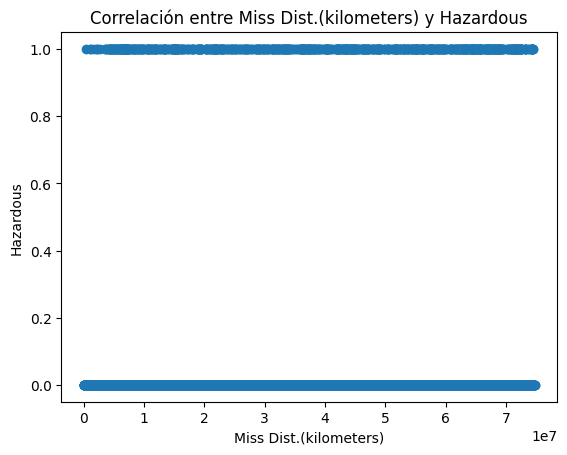

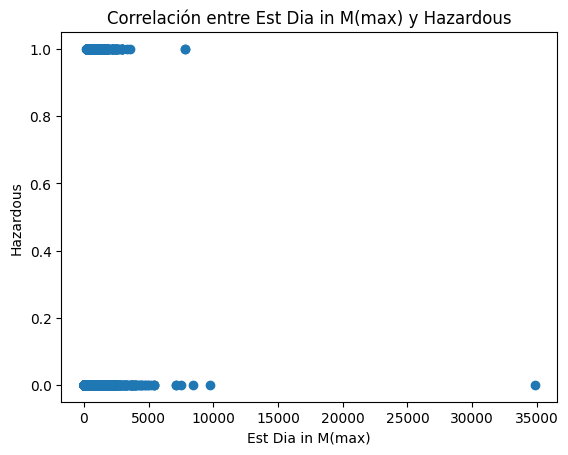

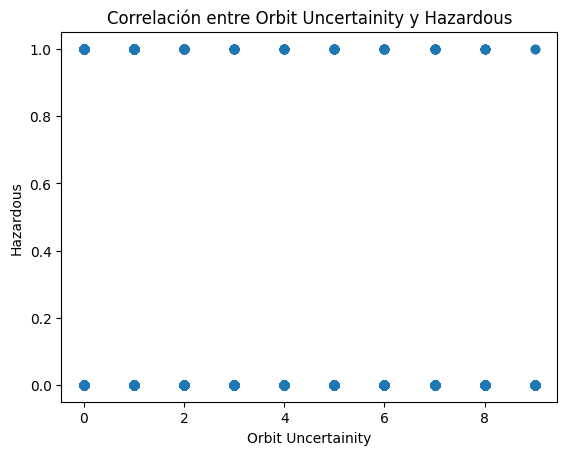

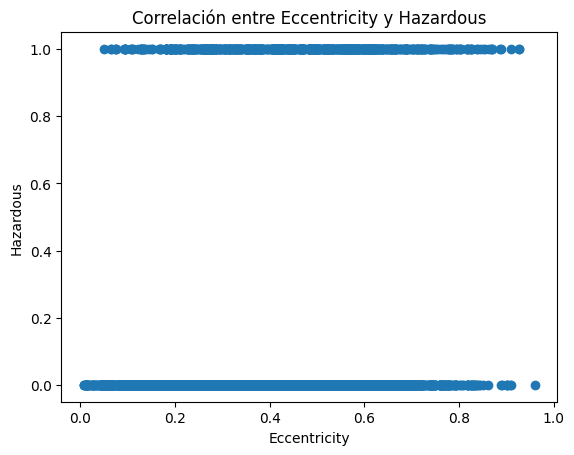

In [7]:
#Con matplotlib graficamos la correlación entre Miss Dist.(kilometers) y Hazardous
import matplotlib.pyplot as plt
plt.scatter(data['Miss Dist.(kilometers)'], data['Hazardous'])
plt.xlabel('Miss Dist.(kilometers)')
plt.ylabel('Hazardous')
plt.title('Correlación entre Miss Dist.(kilometers) y Hazardous')
plt.show()

plt.scatter(data['Est Dia in M(max)'], data['Hazardous'])
plt.xlabel('Est Dia in M(max)')
plt.ylabel('Hazardous')
plt.title('Correlación entre Est Dia in M(max) y Hazardous')
plt.show()

plt.scatter(data['Orbit Uncertainity'], data['Hazardous'])
plt.xlabel('Orbit Uncertainity')
plt.ylabel('Hazardous')
plt.title('Correlación entre Orbit Uncertainity y Hazardous')
plt.show()

plt.scatter(data['Eccentricity'], data['Hazardous'])
plt.xlabel('Eccentricity')
plt.ylabel('Hazardous')
plt.title('Correlación entre Eccentricity y Hazardous')
plt.show()


De estas cuatro columnas al parecer sólo `Est Dia in M(max)` tiene alguna correlación con `Hazardous` en cuanto a que hay más objetos con un diámetro estimado grande que se consideran no peligrosos que los que sí se consideran peligrosos. El resto de columnas no parece en principio tener una correlación directa con `Hazardous`, sin embargo esto puede cambiar cuando se consideren varias columnas a la vez.

Otro aspecto importante es tener una idea de la distribución de los datos de las columnas. Vamos a evaluar la distribución de los valores de las columnas `Absolute Magnitude`, `Miss Dist.(kilometers)`, `Est Dia in M(max)`, `Orbit Uncertainity`, `Minimum Orbit Intersection` y `Eccentricity`.

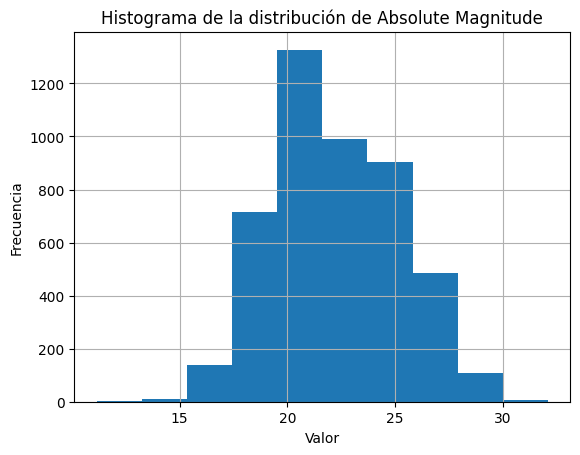

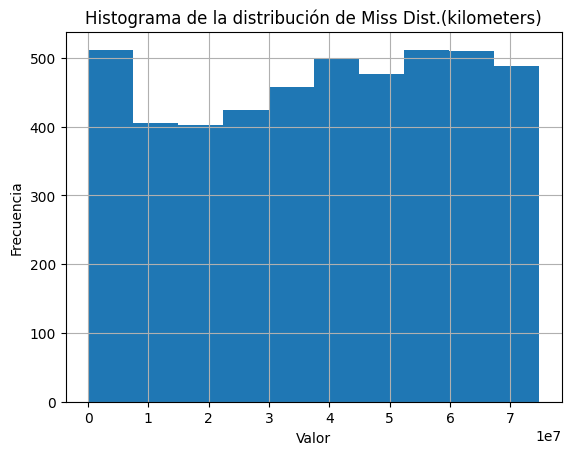

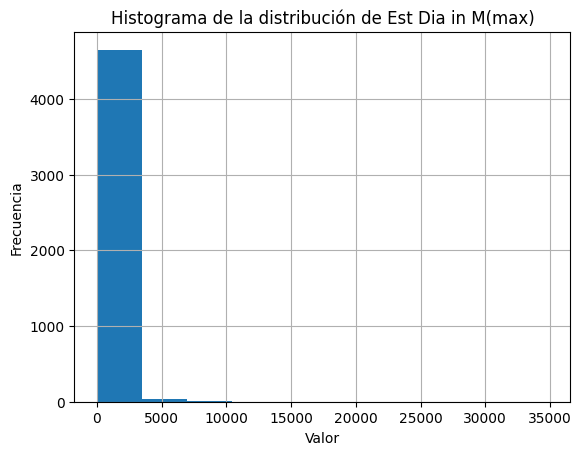

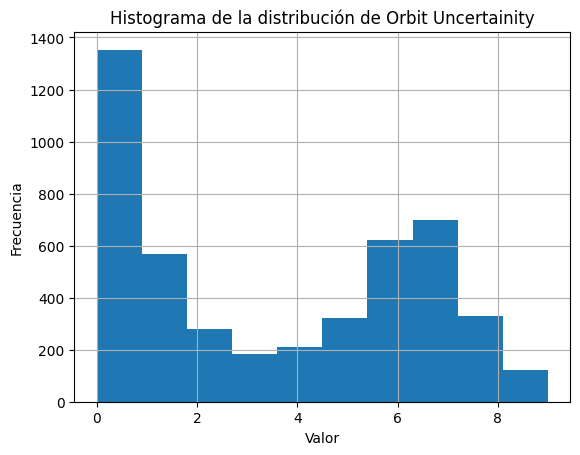

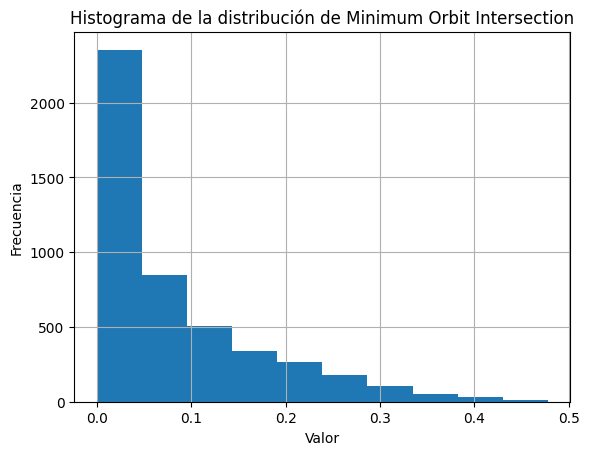

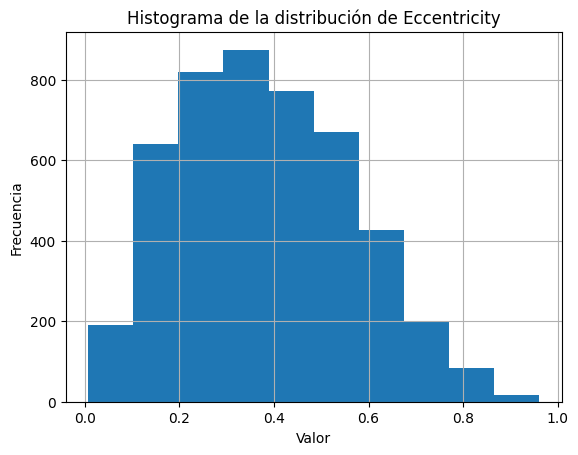

In [8]:
import matplotlib.pyplot as plt

#Graficamos la distribución de los valores de cuatro columnas con relación a su frecuencia
#frecuencia = número de registros con dicho valor en la columna.
data['Absolute Magnitude'].hist()
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de la distribución de Absolute Magnitude')
plt.show()

data['Miss Dist.(kilometers)'].hist()
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de la distribución de Miss Dist.(kilometers)')
plt.show()

data['Est Dia in M(max)'].hist()
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de la distribución de Est Dia in M(max)')
plt.show()

data['Orbit Uncertainity'].hist()
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de la distribución de Orbit Uncertainity')
plt.show()

data['Minimum Orbit Intersection'].hist()
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de la distribución de Minimum Orbit Intersection')
plt.show()

data['Eccentricity'].hist()
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de la distribución de Eccentricity')
plt.show()

Todas las columnas presentan una distribución diferente. Las columnas `Absolute Magnitude` y `Eccentricity` recuerdan a una distribución normal o binomial con la mayoría de valores entre 17 u 27 para la primera, y 0.2 y 0.6 para la segunda. La columna `Miss Dist.(kilometers)` es casi constante, salvo por una menor frecuencia de distancias medianas a la Tierra frente a las distancias cercanas y lejanas de encuentro. Los valores de la columna `Est Dia in M(max)` están claramente centrados en torno a 0 y 3000 metros aproximadamente, y aunque existen valores superiores que se pueden considerar como anómalos, son realmente pocos Algo similar ocurre con la columna `Minimum orbit intersection`, donde la mayoría de datos se ubican en valores superiores a 0.2. Finalmente, la columna `Orbit Uncertainity` tiene una distribución irregular, centrada en dos valores; el valor 0 que presenta la mayor cantidad de frecuencias, y los valores 6 y 7. La baja incertidumbre se debe a los equipos y la tecnología disponible para estimar con gran precisión y confianza las órbitas de los objetos, pero ahora mismo desconocemos la razón de por qué hay un segundo grupo de registros que se concentran entre 6 y 7; quizás por tratarse de objetos muy pequeños y lejanos para los que es difícil dar seguimiento.  

Con la exploración realizada al dataset, podemos estar seguros que tenemos datos completos, sin registros con columnas nulas, confiables, pues provienen de fuentes oficiales de la NASA, y de calidad. Decimos que los datos son de calidad porque las columnas presentan información relevante para determinar si un objeto es realmente peligroso o no para la Tierra, y hemos visto con algunas de ellas que la distribución de sus datos parece ser natural y coherente con lo que cada columna representa.  

# 3. Preparación de los Datos

En esta sección vamos a preparar los datos para que sean lo más óptimos para usarlos en los modelos. Para esto buscamos reducir y limpiar el dataset seleccionando columnas importantes y eliminando las redundantes, eliminando registros vacíos y de ser posible eliminar datos anómalos. 

## 3.1. Limpieza y selección de datos

Como pudimos ver en la sección 2.1, nuestro dataset no tiene registros nulos en ninguna columna. Podemos volver a comprobarlo:

In [9]:
#Contamos la cantidad de registros nulos por cada columna
print("\nValores nulos por columna:")
print(data.isnull().sum())


Valores nulos por columna:
Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis     

Hasta el momento hemos confiado en que cada registro es único, pero ahora vamos a compobar si esto es cierto. Para eso vamos a obtener el número de veces que aparece un valor en la columna `Neo Reference ID`. Lo esperado es que todos aparezcan una sola vez.

In [10]:
#Contamos el número de veces que aparece cada valor en Neo Reference ID
data['Neo Reference ID'].value_counts()

Neo Reference ID
3748472    7
3102762    7
2277810    6
3772993    6
3566465    5
          ..
3772756    1
3297180    1
3267371    1
3275443    1
3772978    1
Name: count, Length: 3692, dtype: int64

Totalmente contrario a lo esperado, hay valores que se repiten en más de una ocasión. El método nos muestra sólo los primeros 5 valores con los que esto sucede e indica que en realidad tenemos 3692 registros con un valor único en `Neo Reference ID`, es decir, nuestro dataset tiene la información de 3692 objetos astronómicos cercanos a la Tierra. Ahora vamos a averiguar concretamente cuántos valores repetidos hay.

In [11]:
#Primero cuenta las apariciones únicas y luego muestra aquellas donde el valor aparece más de una vez.
non_unique_ids = data['Neo Reference ID'].value_counts()
non_unique_ids.loc[non_unique_ids > 1]

Neo Reference ID
3748472    7
3102762    7
2277810    6
3772993    6
3566465    5
          ..
3769400    2
3600106    2
3015691    2
3752441    2
2162173    2
Name: count, Length: 751, dtype: int64

En total hay 751 registros con un valor no único en `Neo Reference ID`. Vamos a elegir tres de estos valores para comprobar si sus registros asociados son idénticos o si hay alguna diferencia entre ellos.

In [12]:
#Eliminamos el límite de columnas mostradas
pd.set_option('display.max_columns', None)
data.loc[data['Neo Reference ID']==3748472]


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
239,3748472,3748472,26.9,0.01108,0.024777,11.080388,24.776501,0.006885,0.015395,36.352981,81.287736,1996-08-08,839487600000,9.994684,35980.862038,22357.108415,0.186124,72.402267,27843766.0,17301314.0,Earth,4,2017-04-06 08:27:11,7,0.033695,6.057,2458000.5,0.165903,1.002189,2.079748,227.003992,366.457019,0.835923,194.910729,1.168456,2.458098e+06,264.438256,0.98238,J2000,False
728,3748472,3748472,26.9,0.01108,0.024777,11.080388,24.776501,0.006885,0.015395,36.352981,81.287736,1999-08-15,934700400000,5.669503,20410.210362,12682.110988,0.051194,19.914324,7658459.0,4758746.0,Earth,4,2017-04-06 08:27:11,7,0.033695,6.057,2458000.5,0.165903,1.002189,2.079748,227.003992,366.457019,0.835923,194.910729,1.168456,2.458098e+06,264.438256,0.98238,J2000,False
910,3748472,3748472,26.9,0.01108,0.024777,11.080388,24.776501,0.006885,0.015395,36.352981,81.287736,2000-08-15,966322800000,4.740046,17064.164674,10603.008322,0.036431,14.171577,5449969.0,3386453.5,Earth,4,2017-04-06 08:27:11,7,0.033695,6.057,2458000.5,0.165903,1.002189,2.079748,227.003992,366.457019,0.835923,194.910729,1.168456,2.458098e+06,264.438256,0.98238,J2000,False
1412,3748472,3748472,26.9,0.01108,0.024777,11.080388,24.776501,0.006885,0.015395,36.352981,81.287736,2003-08-08,1060326000000,2.608256,9389.721746,5834.407937,0.085311,33.186127,12762400.0,7930188.0,Earth,4,2017-04-06 08:27:11,7,0.033695,6.057,2458000.5,0.165903,1.002189,2.079748,227.003992,366.457019,0.835923,194.910729,1.168456,2.458098e+06,264.438256,0.98238,J2000,False
1980,3748472,3748472,26.9,0.01108,0.024777,11.080388,24.776501,0.006885,0.015395,36.352981,81.287736,2006-06-22,1150959600000,3.964090,14270.725317,8867.273739,0.142288,55.349949,21285950.0,13226477.0,Earth,4,2017-04-06 08:27:11,7,0.033695,6.057,2458000.5,0.165903,1.002189,2.079748,227.003992,366.457019,0.835923,194.910729,1.168456,2.458098e+06,264.438256,0.98238,J2000,False
2631,3748472,3748472,26.9,0.01108,0.024777,11.080388,24.776501,0.006885,0.015395,36.352981,81.287736,2009-05-22,1242975600000,4.405122,15858.439497,9853.817586,0.159127,61.900223,23804992.0,14791736.0,Earth,4,2017-04-06 08:27:11,7,0.033695,6.057,2458000.5,0.165903,1.002189,2.079748,227.003992,366.457019,0.835923,194.910729,1.168456,2.458098e+06,264.438256,0.98238,J2000,False
3343,3748472,3748472,26.9,0.01108,0.024777,11.080388,24.776501,0.006885,0.015395,36.352981,81.287736,2012-04-22,1335078000000,4.076891,14676.807083,9119.597156,0.141958,55.221783,21236662.0,13195850.0,Earth,4,2017-04-06 08:27:11,7,0.033695,6.057,2458000.5,0.165903,1.002189,2.079748,227.003992,366.457019,0.835923,194.910729,1.168456,2.458098e+06,264.438256,0.98238,J2000,False


In [13]:
data.loc[data['Neo Reference ID']==3566465]

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
2518,3566465,3566465,23.0,0.066766,0.149293,66.765941,149.293183,0.041486,0.092766,219.048371,489.807048,2008-11-15,1226736000000,13.131082,47271.894012,29372.916588,0.164044,63.813213,24540670.0,15248865.0,Earth,10,2017-04-06 08:53:27,8,0.065313,5.974,2455707.5,0.085973,1.007766,22.485793,65.777659,369.52022,0.921126,6.746193,1.094407,2.455534e+06,168.728091,0.974236,J2000,False
2753,3566465,3566465,23.0,0.066766,0.149293,66.765941,149.293183,0.041486,0.092766,219.048371,489.807048,2009-11-22,1258876800000,12.563186,45227.469409,28102.590645,0.099944,38.878029,14951338.0,9290331.0,Earth,10,2017-04-06 08:53:27,8,0.065313,5.974,2455707.5,0.085973,1.007766,22.485793,65.777659,369.52022,0.921126,6.746193,1.094407,2.455534e+06,168.728091,0.974236,J2000,False
3506,3566465,3566465,23.0,0.066766,0.149293,66.765941,149.293183,0.041486,0.092766,219.048371,489.807048,2012-12-08,1354953600000,13.046735,46968.245275,29184.241071,0.154423,60.070366,23101282.0,14354472.0,Earth,10,2017-04-06 08:53:27,8,0.065313,5.974,2455707.5,0.085973,1.007766,22.485793,65.777659,369.52022,0.921126,6.746193,1.094407,2.455534e+06,168.728091,0.974236,J2000,False
3629,3566465,3566465,23.0,0.066766,0.149293,66.765941,149.293183,0.041486,0.092766,219.048371,489.807048,2013-05-22,1369206000000,12.000327,43201.176062,26843.530759,0.178560,69.459969,26712246.0,16598220.0,Earth,10,2017-04-06 08:53:27,8,0.065313,5.974,2455707.5,0.085973,1.007766,22.485793,65.777659,369.52022,0.921126,6.746193,1.094407,2.455534e+06,168.728091,0.974236,J2000,False
3771,3566465,3566465,23.0,0.066766,0.149293,66.765941,149.293183,0.041486,0.092766,219.048371,489.807048,2013-12-15,1387094400000,13.955213,50238.768064,31216.416745,0.227334,88.432945,34008692.0,21132020.0,Earth,10,2017-04-06 08:53:27,8,0.065313,5.974,2455707.5,0.085973,1.007766,22.485793,65.777659,369.52022,0.921126,6.746193,1.094407,2.455534e+06,168.728091,0.974236,J2000,False


In [14]:
data.loc[data['Neo Reference ID']==3015691]  

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
616,3015691,3015691,21.1,0.16016,0.358129,160.160338,358.129403,0.099519,0.222531,525.460443,1174.965271,1998-11-22,911721600000,16.038509,57738.631509,35876.540228,0.040323,15.685511,6032182.5,3748224.50,Earth,33,2016-12-10 15:01:27,0,0.036966,6.778,2457800.5,0.443803,0.850927,23.745884,236.287236,286.705852,0.473283,320.91279,1.22857,2.457810e+06,348.093788,1.255642,J2000,True
2747,3015691,3015691,21.1,0.16016,0.358129,160.160338,358.129403,0.099519,0.222531,525.460443,1174.965271,2009-11-22,1258876800000,16.893060,60815.014676,37788.085091,0.042579,16.563202,6369716.5,3957958.25,Earth,33,2016-12-10 15:01:27,0,0.036966,6.778,2457800.5,0.443803,0.850927,23.745884,236.287236,286.705852,0.473283,320.91279,1.22857,2.457810e+06,348.093788,1.255642,J2000,True


In [15]:
#Si se desea, ejecute esta línea para restablecer el máximo de columnas mostradas
pd.set_option('display.max_columns', None)

Con los tres valores aquí presentados podemos observar que aunque se trata, en cada caso, del mismo objeto con las mismas propiedades de tamaño, órbita e identificación, las columnas referentes a un encuentro cercano con la Tierra son distintas, nótese los valores en `Close Approach Date`, `Relative Velocity km per sec` y `Miss Dist.(kilometers)`. Es en este momento que nos enteramos que cada registro no representa un objeto cercano a la Tierra, sino encuentros cercanos entre la Tierra y estos objetos. Cabe destacar que todos los registros del mismo objeto, sin importar que se trate de distintos encuentros, tienen el mismo valor en `Hazardous`. Esto porque el CNEOS clasifica a los objetos como peligrosos o no, y no a los encuentros en sí. Por lo tanto, no vamos a eliminar ninguno de estos registros ya que difieren en columnas que consideramos importantes para la toma de decisiones.

Para terminar con la limpieza de los datos, vamos a tratar de eliminar datos anómalos que pueden entorpecer la toma de decisiones. Seleccionamos algunas columnas que nos resultan especialmente importantes y analizamos su media, desviación estándar y los cuartiles de los datos.

In [16]:
data[['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)', #Atributos físicos del objeto
      'Relative Velocity km per sec', 'Miss Dist.(kilometers)', #Atributos de un encuentro cercano entre la Tierra y el objeto
      'Orbit Uncertainity', 'Jupiter Tisserand Invariant', 'Eccentricity', 'Orbital Period']].describe() #Atributos de la órbita del objeto

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Jupiter Tisserand Invariant,Eccentricity,Orbital Period
count,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000
mean,22.267865,0.204604,0.457509,13.970811,3.841347e+07,3.516962,5.056111,0.382569,635.582076
std,2.890972,0.369573,0.826391,7.293223,2.181110e+07,3.078307,1.237818,0.180444,370.954727
min,11.160000,0.001011,0.002260,0.335504,2.660989e+04,0.000000,2.196000,0.007522,176.557161
25%,20.100000,0.033462,0.074824,8.432865,1.995928e+07,0.000000,4.049500,0.240858,365.605031
50%,21.900000,0.110804,0.247765,12.917889,3.964771e+07,3.000000,5.071000,0.372450,504.947292
75%,24.500000,0.253837,0.567597,18.077649,5.746863e+07,6.000000,6.019000,0.512411,794.195972
max,32.100000,15.579552,34.836938,44.633747,7.478160e+07,9.000000,9.025000,0.960261,4172.231343


Queremos centrar la atención en dos de estas columnas: `Orbit Uncertainity` y `Orbital Period`. `Orbit Uncertainity` si bien tiene una desviación estándar relativamente baja, recordemos que esta columna toma valores discretos entre 0 y 9. El cuartil 3 indica que el 75% de los datos son menores o iguales por lo que podríamos considerar que los datos con valores de 7, 8 y 9 como anómalos o poco importantes, ya que de hecho los valores altos en esta columna indican que no hay mucha o ninguna seguridad sobre la órbita estimada para el objeto y por lo tanto puede ser incorrecta. En cuando a `Orbital Period` podemos observar una desviación estándar muy grande y se puede entender al ver que en el cuartil 3 tenemos un valor de 794 días, pero el máximo valor es de 4172 días. Es posible que los objetos con un periodo orbital muy largo sólo se acerquen a la Tierra por un breve periodo de tiempo y sin mucha regularidad.

Dicho esto, se eliminarán los registros con un valor de `Orbital Period` mayor a 1000 días y con un valor de `Orbit Uncertainity` mayor a 6. Luego de esta reducción, deberíamos quedarnos con más del 75% de los datos iniciales.

In [17]:
#Eliminamos los registros con valores de Orbital Period > 100 y Orbit Uncertainity > 7

data.drop(data[(data['Orbital Period'] > 1000) & (data['Orbit Uncertainity'] > 7)].index)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,6.275369e+07,3.899334e+07,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,5.729815e+07,3.560342e+07,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7.622912e+06,4.736658e+06,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,4.268362e+07,2.652237e+07,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,6.101082e+07,3.791037e+07,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,323.612307,2016-09-08,1473318000000,22.154265,79755.354273,49556.875548,0.041361,16.089413,6.187511e+06,3.844741e+06,Earth,4,2017-04-06 08:24:07,8,0.019777,5.156,2457637.5,0.361512,1.161429,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,44.670934,2016-09-08,1473318000000,3.225150,11610.539577,7214.337772,0.006469,2.516399,9.677324e+05,6.013211e+05,Earth,2,2017-04-06 08:23:58,6,0.006451,5.742,2458000.5,0.073200,1.075134,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,562.373736,2016-09-08,1473318000000,7.191642,25889.910626,16086.983633,0.061009,23.732393,9.126775e+06,5.671115e+06,Earth,17,2017-04-06 08:23:43,6,0.059972,4.410,2458000.5,0.368055,1.528234,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,37597

Esta reducción no es muy significante, pasamos de 4687 registros a 4563 lo que representa el 97.35% de los datos iniciales. Si bien es cierto que queremos mantener una buena cantidad de datos, también nos interesa deshacernos de datos anómalos. Para esto, se decidió finalmente hacer la reducción sólo con la columna `Orbit Uncertainity`, ya que una órbita que incluso con los instrumentos y la tecnología avanzada de la NASA no es segura ni certera puede afectar negativamente a la toma de decisiones.

In [18]:
#Eliminamos los registros con valores de Orbit Uncertainity > 7

data = data.drop(data[data['Orbit Uncertainity'] > 7].index)

data

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,6.275369e+07,3.899334e+07,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,5.729815e+07,3.560342e+07,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7.622912e+06,4.736658e+06,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,4.268362e+07,2.652237e+07,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,6.101082e+07,3.791037e+07,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4681,3662283,3662283,20.700,0.192555,0.430566,192.555078,430.566244,0.119648,0.267541,631.742403,1412.618957,2016-09-08,1473318000000,26.016058,93657.808288,58195.319822,0.167564,65.182297,2.506718e+07,1.557602e+07,Earth,16,2017-04-06 08:42:24,1,0.121499,3.843,2458000.5,0.652899,1.706178,23.893424,145.035928,814.019755,0.592216,110.720210,2.820140,2.457597e+06,178.503886,0.442250,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,44.670934,2016-09-08,1473318000000,3.225150,11610.539577,7214.337772,0.006469,2.516399,9.677324e+05,6.013211e+05,Earth,2,2017-04-06 08:23:58,6,0.006451,5.742,2458000.5,0.073200,1.075134,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,562.373736,2016-09-08,1473318000000,7.191642,25889.910626,16086.983633,0.061009,23.732393,9.126775e+06,5.671115e+06,Earth,17,2017-04-06 08:23:43,6,0.059972,4.410,2458000.5,0.368055,1.528234,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3

Ahora logramos reducir los registros de 4687 a 4235, que representa el 90.36% de los datos iniciales. Esta reducción se considera buena porque logramos deshacernos de aproximadamente un 10% de los registros, lo cual no representa un gran cambio frente al resto de registros y en este contexto, estos registros correspondían a objetos cuya órbita estimada no es nada certera, segura ni confiable.

## 3.2. Construcción de atributos y transformaciones  

Las transformaciones al dataframe se hacen para reducir y eliminar las columnas que sean redundantes o inútiles para la toma de decisiones. Como ya se ha comentado, algunas columnas expresan la misma información solo que en unidades de medida distinta. Otras columnas tienen valores únicos, es decir que para todos los registros el valor es el mismo, y algunas son columnas de identficiación que no aportan información útil. 

In [19]:
deleted_columns = ['Neo Reference ID', 'Name', #Columnas de identificación
                   'Est Dia in KM(min)', 'Est Dia in KM(max)', #El diámetro estimado se usará en metros, se eliminan los valores en km, millas y pies
                    'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 
                    'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
                    'Epoch Date Close Approach', #Se usará la fecha en formato dateatime
                    'Relative Velocity km per hr', 'Miles per hour', #Para la velocidad se usará el valor en km/s
                    'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(miles)', #La distancia del encuentro se medirá en kilometros
                    'Orbiting Body', #Para todos los registros el valor de esta columa es 'Earth'
                    'Orbit ID', #Identificación de la órbita, no es relevante
                    'Epoch Osculation', 'Perihelion Time', #Son valores de referencia para ubicar a un objeto en el espacio en un momento exacto
                    #Son importantes para otros análisis, pero no para el que estamos desarrollando.
                    'Equinox'] #Para todos los registros el valor de esta columa es 'J2020'

data = data.drop(columns=deleted_columns, axis=1)

data

,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Close Approach Date,Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Mean Motion,Hazardous
0,21.600,127.219879,284.472297,1995-01-01,6.115834,6.275369e+07,2017-04-06 08:36:37,5,0.025282,4.634,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,264.837533,0.590551,True
1,21.300,146.067964,326.617897,1995-01-01,18.113985,5.729815e+07,2017-04-06 08:32:49,3,0.186935,5.457,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,173.741112,0.845330,False
2,20.300,231.502122,517.654482,1995-01-08,7.590711,7.622912e+06,2017-04-06 09:20:19,0,0.043058,4.557,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,292.893654,0.559371,True
3,27.400,8.801465,19.680675,1995-01-15,11.173874,4.268362e+07,2017-04-06 09:15:49,6,0.005512,5.093,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,68.741007,0.700277,False
4,21.600,127.219879,284.472297,1995-01-15,9.840831,6.101082e+07,2017-04-06 08:57:58,1,0.034798,5.154,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,135.142133,0.726395,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4681,20.700,192.555078,430.566244,2016-09-08,26.016058,2.506718e+07,2017-04-06 08:42:24,1,0.121499,3.843,0.652899,1.706178,23.893424,145.035928,814.019755,0.592216,110.720210,2.820140,178.503886,0.442250,False
4683,28.200,6.089126,13.615700,2016-09-08,3.225150,9.677324e+05,2017-04-06 08:23:58,6,0.006451,5.742,0.073200,1.075134,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,282.978786,0.884117,False
4684,22.700,76.657557,171.411509,2016-09-08,7.191642,9.126775e+06,2017-04-06 08:23:43,6,0.059972,4.410,0.368055,1.528234,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,203.501147,0.521698,False
4685,21.800,116.025908,259.441818,2016-09-08,11.352090,3.900908e+07,2017-04-06 08:23:42,5,0.177510,4.477,0.202565,1.486600,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,203.524965,0.543767,False


Tras esta transformación, nuestro dataset pasa de 4687 registros con 40 columnas a 4235 registros con 21 columnas.

Para finalizar, vamos a usar gráficas para identificar las columnas más relevantes para el análisis y toma de decisiones. Ya hemos reducido el número de columnas en el punto anterior y las 21 columnas que se dejaron van a ser usadas en el análisis de los datos. Sin embargo, de estas variables algunas son más determinantes que otras ya que influyen sobre otras. Como primer acercamiento, podemos comparar las columnas con `Hazardous`, aunque de esta manera estamos tratando de obtener una relación directa entre cada una de las columnas individualmente; probablemente el valor de ninguna columna por sí solo sea suficiente para clasificar un objeto como peligroso o no. 

A continuación se grafican cinco columnas contra `Hazardous` que muestran alguna tendencia entre ellas, aunque no es suficiente como para afirmar que exita una relación.

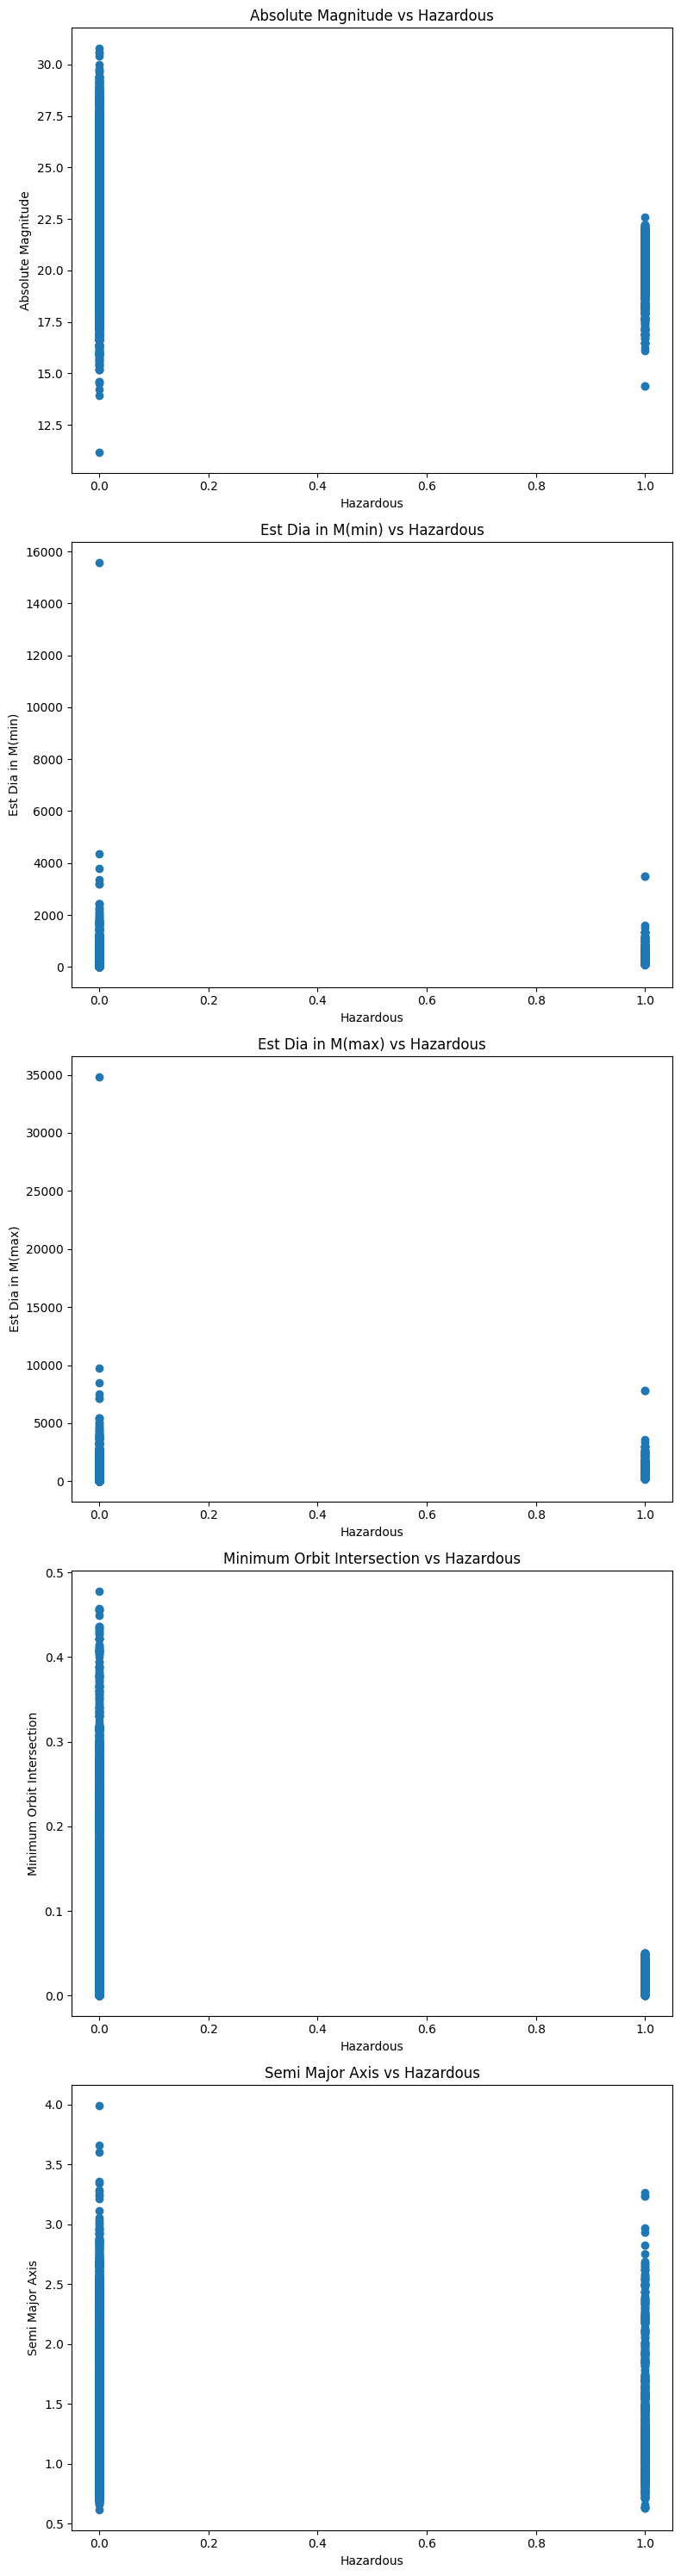

In [20]:
import matplotlib.pyplot as plt

#Estas son las columnas que parecen tener una relación con Hazardous contrastándolas
important_cols = ['Absolute Magnitude', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Minimum Orbit Intersection', 'Semi Major Axis']

fig, axs = plt.subplots(len(important_cols), 1, figsize=(8, 6 * len(important_cols)))

for i, columna in enumerate(important_cols):
    axs[i].scatter(data['Hazardous'], data[columna])  # Graficar columna contra 'e'
    axs[i].set_xlabel('Hazardous')
    axs[i].set_ylabel(columna)
    axs[i].set_title(f'{columna} vs Hazardous')

plt.tight_layout()
plt.show()


Como se dijo anteriormente, se puede ver una tendencia de que los valores altos en estas columnas no se relacionan con objetos clasificados como peligrosos; pero los valores bajos se relacionan tanto con los objetos peligrosos como los que no.

Para ir más a detalle, vamos a usar un mapa de calor que muestre la correlación lineal entre las columnas. Sabemos que existen varios tipos de correlaciones además de la lineal, pero para este fin es suficiente para ubicar columnas estrechamente relacionadas. En el mapa se muestran todas las 21 columnas donde se indica en un rango de -1 a 1 la correlación lineal entre dos de ellas. Los valores cercanos a 1 (rojo) indican fuerte correlación positiva, los cercanos a -1 (azul) indican fuerte correlación negativa y los cercanos a 0 (gris) indican que no hay correlación significativa.

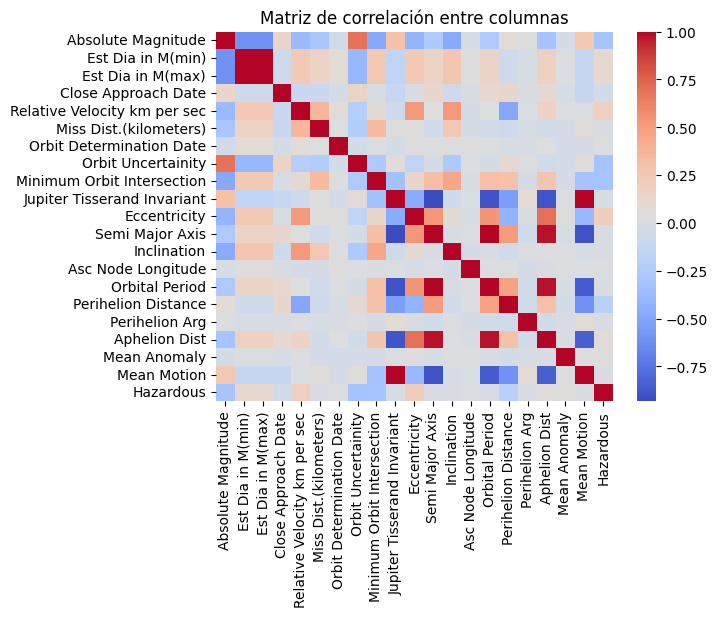

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

#Obtenemos la correlación entre columnas
correlation = data.corr()

#Mapa de calor con Seaborn
sns.heatmap(correlation, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre columnas')
plt.show()

Se debe ignorar la línea diagonal donde se intersecan cada columna consigo misma, en este caso la correlación siempre será 1. Las columnas de características orbitales, desde `Minimum Orbit Intersection` hasta `Mean Motion` tienen valores altos de correlación, tanto negativa como positiva, con la excepción de `Inclination`, `Asc Node Longitude`, `Perihelion Distance` y `Mean Anomaly`. La columna `Hazardous` no tiene correlación significativa con ninguna columna, pero sí muestra algo de relación con las características físicas de los objetos. El análisis de los modelos se encargará de descubrir las verdaderas relaciones entre todas las columnas para determinar si un objeto es peligroso o no, porque en este mapa de calor seguimos comparando las columnas una a una.

Se le dará un enfoque especial a las características físicas y orbitales de los objetos, más que a las características de los encuentros que parecen estar más disasociados del resto de variables.

# 4. Modelado  

## 4.1. Selección de modelo y experimentación  

A continuación se mostrarán 4 experimientos realizados con 4 modelos de aprendizaje automático diferentes; Gradient Boosting, Máquinas de soporte vectorial, K-Nearest Neighbors y Random Forest. Estos modelos son muy utilizados para problemas de clasificación como el problema que buscamos solucionar.

### 4.1.1. Gradient Boosting

El Gradient Boosting consiste en entrenar un modelo base y evaluar los resultados de las predicciones para volver a entrenar otro modelo de forma iterativa. La idea es que el siguiente modelo depure los errores del modelo anterior. Este modelo es muy útil para problemas de clasificación como el que estamos enfrentando. Usaremos la librería XGBoost que implementa Gradient Boosting por medio de árboles de decisión, por lo que tras cada iteración se entrena un árbol de decisión tal que cada vez pueda clasificar mejor los datos. Como contamos con datos tabulados en el dataset, los árboles de decisión funcionan muy bien ya que es relativamente fácil para estos modelos encontrar reglas determinar cuáles son las variables relevantes.  

Para iniciar con la experimentación con Gradient Boosting, separamos las columnas del dataset en variables `X` y la variable `y`, que corresponde a la columna `Hazardous` que es el valor que queremos que nuestro modele prediga. El dataset se divide en un 80% para datos de entrenamiento y un 20% para datos de prueba.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

#XGBoost requiere que todas las columnas sean numéricas, incluida la fecha
data['Close Approach Date'] = pd.to_numeric(data['Close Approach Date'])
data['Orbit Determination Date'] = pd.to_numeric(data['Orbit Determination Date'])

#Separamos las columnas en las variables X y la columna objetivo 'y'; en este caso es Hazardous
X = data.drop('Hazardous', axis=1)
y = data['Hazardous']

#Separamos los datos entre datos de entrenamiento vs datos de prueba con una proporción de 80% / 20%
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.20, random_state=50)

Es importante mencionar que el parámetro `random_state` se indica para garantizar que en cada ejecución el dataset se divida de la misma forma y por ende los resultados siempre serán los mismos. Cambiar este parámetro puede alterar la forma en que se seleccionan los datos y por lo tanto cambiar el entrenamiento del modelo. Sin embargo, se ha comprobado que los resultados en este caso son similares y positivos.  

Con los datos listos, solo falta convertirlos al formato que usa la librería XGBoost para entrenar el modelo. Como configuración para el entrenamiento, indicamos que se trata de un problema de clasificación binaria, nuestra métrica es el error de clasificación el cual queremos minimizar y el número de iteraciones a realizar. A pesar de que sólo se realizan 10 iteraciones, se comprobó que a partir de 4 iteraciones los resultados no cambian para esta selección de datos.  

Tras el entrenamiento, se realiza la prueba o testing prediciendo los datos de prueba con el modelo entrenado. Los primeros resultados en `y_pred` corresponden a la probabilidad de ese valor a pertenecer a la clase Peligroso, es decir `Hazardous=True` o `Hazardous=1`. Como se trata de una clasificación binaria con valores `True` y `False`, se usa la probabilidad para clasificar los resultados por clases tal que si la probabilidad es mayor a 0.5, pertenece a la clase `True`, de lo contrario pertenece a la clase `False`.

In [23]:
import xgboost as xgb

#Convertimos los datos al formato de matriz DMatrix que requiere XGBoost
dtrain = xgb.DMatrix(X_train_xgb, label=y_train_xgb)
dtest = xgb.DMatrix(X_test_xgb, label=y_test_xgb)

#Parámetros del modelo
params = {
    'objective': 'binary:logistic',     #Clasificación binaria (dos clases)
    'eval_metric': 'error'              #Métrica por error de clasificación
}

xgb_model = xgb.train(params, dtrain, num_boost_round=10) #Entrenamiento de XGBoost

y_pred_xgb = xgb_model.predict(dtest) #Testing del XGBoost mediante la predicción de datos

y_pred_binary_xgb = [True if pred > 0.5 else False for pred in y_pred_xgb] #Convertimos las probabilidades a clases


Una vez hecho el entrenamiento y la prueba se procede a evaluar los resultados para a su vez evaluar el desempeño del modelo. Se trató de mostrar los árboles de decisión generados por el modelo, pero para ello se requiere de la librería Graphviz que no se pudo instalar correctamente. Pero en su lugar, se puede observar en un diccionario la importancia de las columnas en las decisiones del modelo. Esta importancia es dada por el número de veces que aparece cada columna en los árboles de decisión, de modo que las que más veces apareces fueron las que le dieron información muy relevante al modelo para guiar la clasificación.

In [24]:
xgb_model.get_score(importance_type='weight')

{'Absolute Magnitude': 29.0,
 'Close Approach Date': 3.0,
 'Relative Velocity km per sec': 2.0,
 'Miss Dist.(kilometers)': 1.0,
 'Orbit Determination Date': 5.0,
 'Orbit Uncertainity': 4.0,
 'Minimum Orbit Intersection': 19.0,
 'Jupiter Tisserand Invariant': 7.0,
 'Eccentricity': 2.0,
 'Inclination': 1.0,
 'Perihelion Distance': 3.0,
 'Perihelion Arg': 1.0,
 'Aphelion Dist': 3.0,
 'Mean Anomaly': 4.0}

Las dos columnas más importantes son `Absolute Magnitude` y `Minimum Orbit Intersection`, con bastante diferencia con respecto a las demás. Sin embargo, todas las variables contribuyeron a la creación de reglas en los árboles de decisión. Las siguientes columnas no aparecen en el diccionario, lo cual indica que en ningún árbol de decisión fueron tomadas en cuenta y por ende su información es irrelevante para el problema de clasificación:
- `Est Dia in M(min)`
- `Est Dia in M(max)`
- `Semi Major Axis`
- `Asc Node Longitude`
- `Orbital Period`
- `Mean Motion`

Ahora, para evaluar los resultados se usará como métrica los valores de *Accuracy*, *Precision* y *Recall* (los dos últimos sobre la clase `True`). Todos ellos cuanto más cerca estén de 1, mejor habrá sido el desempeño del modelo.

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Revisamos la precisión (accuracy) y el recall de los resultados para la clase
#y_test son los valores reales, mientras que y_pred_binary
accuracy_xgb = accuracy_score(y_test_xgb, y_pred_binary_xgb)
print("Accuracy:", accuracy_xgb)

precision_xgb = precision_score(y_test_xgb, y_pred_binary_xgb, zero_division=True)
print("Precision:", precision_xgb)

recall_xgb = recall_score(y_test_xgb, y_pred_binary_xgb)
print("Recall:", recall_xgb)


Accuracy: 0.9964580873671782
Precision: 0.9788732394366197
Recall: 1.0


Los tres valores indican que el desempeño de Gradient Boosting fue excelente. Sin embargo, el cálculo de *Precision* y *Recall* sólo se está aplicando a la clase `True`. A continuación conoceremos los valores tanto para `True` como para `False`, además del valor f1-score.

In [26]:
from sklearn.metrics import classification_report

#Reporte más detallado que incluye a ambas clases y el f1-score
print(classification_report(y_test_xgb, y_pred_binary_xgb))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       708
        True       0.98      1.00      0.99       139

    accuracy                           1.00       847
   macro avg       0.99      1.00      0.99       847
weighted avg       1.00      1.00      1.00       847



Estos resultados se interpretan así:

- El 100% de los datos predichos como de clase `False` pertenecen realmente a la clase `False` (*Precision*).
- El 100% de los datos que realmente pertencen a la clase `False` fueron predichos correctamente (*Recall*).
- El equilibrio entre *precision* y *recall* para la clase `False` es perfecto debido a que f1-score = 1.

- El 98% de los datos predichos como de clase `True` pertenecen realmente a la clase `True`(*Precision*).
    - Un 2% de los datos predichos como de clase `True` pertenecen realmente a la clase `False`.
- El 100% de los datos que realmente pertencen a la clase `True` fueron predichos correctamente (*Recall*).
- El equilibrio entre *precision* y *recall* para la clase `False` es muy bueno debido a que f1-score = 0.99.

El valor de *Acurracy* indica que el modelo logra clasificar extraordiariamente bien los datos, ya que como vimos anteriormente el valor de *Acurracy* no es exactamente 1, sino que es 0.99646. El modelo falla mínimamente al clasificar algunos datos de clase `False` como de clase `True`; falsos positivos. A continuación se muestran los falsos y verdaderos positivos y negativos obtenidos en el resultado, donde los positivos se refieren a datos clasificados como `True` y los negativos son los clasificados como `False`.

In [27]:
from sklearn.metrics import confusion_matrix

#Clasificación de resultados entre falsos y verdaderos positivos
conf_matrix = confusion_matrix(y_test_xgb, y_pred_binary_xgb)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

#Hazardous: valor original / real
#pred_Hazardous: valor predicho por el modelo
print("Verdaderos Negativos:", TN) #Hazardous=False, pred_Hazardous=False
print("Falsos Positivos:", FP) #Hazardous=False, pred_Hazardous=True
print("Falsos Negativos:", FN) #Hazardous=True, pred_Hazardous=False
print("Verdaderos Positivos:", TP) #Hazardous=True, pred_Hazardous=True

Verdaderos Negativos: 705
Falsos Positivos: 3
Falsos Negativos: 0
Verdaderos Positivos: 139


Es importante mencionar que el resultado tiene 3 falsos positivos; 3 objetos se consideraron como peligrosos, aunque afortunadamente no lo son. En cuando a falsos negativos el modelo no tuvo problemas, esto significaría que el modelo haya considerado un objeto como no peligroso cuando en realidad sí lo es y representa una amenaza.

Finalmente, podemos utilizar la métrica de *Cross Entropy* para evaluar la calidad del modelo ya que obtiene la diferencia o discrepancia entre la distribución de los datos reales y los datos predichos. Cuanto menor sea el valor de *Cross Entropy*,  menos diferencia habrá entre ambas distribuciones y por ende mejor será el modelo en predecir los datos.

In [28]:
import numpy as np

#Función de "preparación" para Cross Entropy
def func_cross_entropy(predicted_probs, true_probs):
    #Para el Cross Entropy se debe evitar el uso de ceros.

    not_zero = 1e-15 #Un número ínfimamente pequeño para ajustar los valores
    predicted_probs = np.clip(predicted_probs, not_zero, 1 - not_zero)
    
    #Función de Cross Entropy
    #Con el ajuste anterior, se evitan las situaciones de log(0) y log(1)
    cross_entropy = - np.sum(true_probs * np.log(predicted_probs))
    
    return cross_entropy

cross_entropy_xgb = func_cross_entropy(y_pred_binary_xgb, y_test_xgb)
print("Cross Entropy:", cross_entropy_xgb)

Cross Entropy: 1.3888890038060718e-13


El valor de *Cross Entropy* es de 1.38889×10 <sup>-13</sup>, un valor muy pequeño y cercano a cero. Este valor es sumamente útil para comparar este modelo con otros. Podemos asegurar que el modelo de Gradient Boosting implementado por la librería XGBoost con árboles de decisión tiene un desempeño excelente, capaz de predecir con mucha exactitud los objetos que son o no peligrosos para el planeta Tierra.

### 4.1.2. Máquinas de Soporte Vectorial SVM

Las máquinas de soporte vectorial son un modelo que permiten resolver problemas de clasificación y regresión. El modelo busca un hiperplano que sea capaz de separar los datos en clases, garantizando el máximo margen entre los datos y el hiperplano. Este modelo suele ser excepcionalmente bueno para problemas de clasificación binaria y se puede emplear para trabajar con distintas dimensiones. El modelo SVM que se usará es el implementado por la librería `sklearn`.

Primero se separan las columnas del dataset en variables `X` y la variable `y`, que corresponde a la columna `Hazardous` que es el valor que queremos que nuestro modele prediga. El dataset se divide en un 80% para datos de entrenamiento y un 20% para datos de prueba.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Dividir los datos en características (X) y etiquetas (y)
X = data.drop('Hazardous', axis=1)
y = data['Hazardous']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.20, random_state=50)


El kernel o método del modelo SVM es rbf o radial. Esto porque el kernel lineal requería una cantidad exagerada de tiempo y poder de procesamiento con la que el equipo no cuenta, por ende, ningún entrenamiento con kernel lineal se pudo completar. Tras definir el modelo SVM a usar, se entrena con los datos seleccionados para el entrenamiento y luego de prueba con la predicción de los datos de prueba. 

In [30]:
# Crear un clasificador SVM
svm_classifier = SVC(kernel='rbf')

#Entrenamiento del modelo SVM
svm_classifier.fit(X_train_svm, y_train_svm)

#Prueba del modelo con predicción (clasificación binaria)
y_pred_svm = svm_classifier.predict(X_test_svm)

Seguidamente se revisarán los resultados obtenidos de la predicción del modelo. Usaremos como métrica los valores de *Accuracy*, *Precision* y *Recall* (los dos últimos sobre la clase `True`). Para todos ellos, cuanto más cerca estén de 1, mejor habrá sido el desempeño del modelo. 

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calcular la precisión del modelo
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
print("Accuracy:", accuracy_svm)

precision_svm = precision_score(y_test_svm, y_pred_svm, zero_division=True)
print("Precision:", precision_svm)

recall_svm = recall_score(y_test_svm, y_pred_svm)
print("Recall:", recall_svm)

Accuracy: 0.8358913813459268
Precision: 1.0
Recall: 0.0


Preliminarmente, los valores muestran que el modelo SVM no tuvo un buen desempeño, y el valor de *Recall* indica un desempeño malo para la clase `True`. A continuación visualizaremos los valores tanto para `True` como para `False` y el valor f1-score. 

In [32]:
from sklearn.metrics import classification_report

#Reporte más detallado que incluye a ambas clases y el f1-score
print(classification_report(y_test_svm, y_pred_svm, zero_division=True))

              precision    recall  f1-score   support

       False       0.84      1.00      0.91       708
        True       1.00      0.00      0.00       139

    accuracy                           0.84       847
   macro avg       0.92      0.50      0.46       847
weighted avg       0.86      0.84      0.76       847



El reporte de resultados se interpreta así:

- El 84% de los datos predichos como de clase `False` pertenecen realmente a la clase `False` (*Precision*).
- El 100% de los datos que realmente pertencen a la clase `False` fueron predichos correctamente (*Recall*).
- El equilibrio entre *precision* y *recall* para la clase `False` es bueno, o considerablemente aceptable, debido a que f1-score = 0.91.

- El 100% de los datos predichos como de clase `True` pertenecen realmente a la clase `True`(*Precision*).
- El 0% de los datos que realmente pertencen a la clase `True` fueron predichos correctamente (*Recall*).
    - Por ende, el modelo no pudo predecir ningún dato como de clase `True`
- El equilibrio entre *precision* y *recall* para la clase `False` es malo debido a que f1-score = 0.

El valor de *Acurracy* indica que el modelo logra clasificar el 84% de los datos correctamente, el cual es un resultado que para el negocio se considera deficiente e inaceptable. El modelo falla al clasificar los datos de clase `True` como de clase `False`; falsos negativos, que a comparación de los falsos positivos, son completamente inaceptables. A continuación se muestran los falsos y verdaderos positivos y negativos obtenidos en el resultado, donde los positivos se refieren a datos clasificados como `True` y los negativos son los clasificados como `False`. 

In [33]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test_svm, y_pred_svm)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

print("Verdaderos Negativos:", TN)
print("Falsos Positivos:", FP)
print("Falsos Negativos:", FN)
print("Verdaderos Positivos:", TP)

Verdaderos Negativos: 708
Falsos Positivos: 0
Falsos Negativos: 139
Verdaderos Positivos: 0


Ahora es completamente evidente que el modelo predijo la totalidad de los datos (847 en total) como de clase `False`; ninguno de los datos se predijo como `True`. Esto quiere decir que el modela considera a todos los objetos como no peligrosos, cuando en realidad hay 139 objetos que sí lo son y por culpa de estos resultados estos objetos peligrosos serían ignorados; por esta razón se dice que los falsos positivos son tolerables, pero no los falsos negativos.

Por último, obtenemos la métrica *Cross Entropy* para evaluar la calidad del modelo frente a otros. *Cross Entropy* indica la diferencia o discrepancia entre la distribución de los datos reales y los datos predichos. Cuanto menor sea el valor de *Cross Entropy*,  menos diferencia habrá entre ambas distribuciones y por ende mejor será el modelo en predecir los datos, por lo que en este caso podemos esperar un valor grande de *Cross Entropy*. 

In [34]:
import numpy as np

#Función de "preparación" para Cross Entropy
def func_cross_entropy(predicted_probs, true_probs):
    #Para el Cross Entropy se debe evitar el uso de ceros.

    not_zero = 1e-15 #Un número ínfimamente pequeño para ajustar los valores
    true_probs = np.clip(true_probs, not_zero, 1 - not_zero)
    predicted_probs = np.clip(predicted_probs, not_zero, 1 - not_zero)
    
    #Función de Cross Entropy
    #Con el ajuste anterior, se evitan las situaciones de log(0) y log(1)
    cross_entropy = - np.sum(true_probs * np.log(predicted_probs))
    
    return cross_entropy

cross_entropy_svm = func_cross_entropy(y_pred_svm, y_test_svm)
print("Cross Entropy:", cross_entropy_svm)

Cross Entropy: 4800.889918892576


El valor de *Cross Entropy* es de 4800.88993, un valor grande como se esperaba. El modelo SVM con kernel rbf de la librería sklearn tiene un desempeño deficiente, pues a pesar de que logra predecir correctamente los objetos no peligrosos, falla completamente al clasificiar objetos que sí representan una amenaza para la Tierra como si fueran inofensivos. 


### 4.1.3. K Nearest Neighbors (KNN)

El modelo KNN es un modelo de clasificación. El predice la clase correcta para los datos de prueba calculando la distancia entre estos y todos los puntos de entrenamiento, y luego selecciona los K puntos más cercanos. KNN calcula la probabilidad de que los datos de prueba pertenezcan a las clases de los 'K' datos de entrenamiento, y selecciona `la clase con la probabilidad más alta`. Para implementar este modelo se ha decidido utilizar la librería de `scikit-learn`, abreviada como `sklearn`, la cual proporciona una amplia gama de algoritmos de aprendizaje supervisado y no supervisado, así como herramientas para preprocesamiento de datos, selección de características, evaluación de modelos.

In [35]:
#Se importan las librerías para trabajar con el algoritmo KNN
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Fase de entrenamiento: 

El primer paso al implementar este algoritmo es separar las columnas del dataset en variables `X` y la variable `y`, que corresponde a la columna `Hazardous` (valor que predecirá el KNN). Se ha dividido el conjunto de datos en *80%* para datos de entrenamiento y un *20%* para datos de prueba.
También es importante definir la cantidad de vecinos que el modelo utilizará para hacer predicciones, en este caso de ha elegido el valor de *n = 8*; este número se ha escogido después de hacer pruebas con varios valores (entre los que se encuentran: 5,10,20,50 y 100) y determinar que con 8 vecinos se alcanza un punto óptimo. 

In [36]:
#Entrenamiento del modelo

knn_model = KNeighborsClassifier(n_neighbors=8)  #Creamos el modelo y especificamos el número de vecinos (k)

#Se requiere que todas las columnas sean numéricas, incluida la fecha
data['Close Approach Date'] = pd.to_numeric(data['Close Approach Date'])
data['Orbit Determination Date'] = pd.to_numeric(data['Orbit Determination Date'])

#Separamos las columnas en las variables 'X' y la columna objetivo 'y'; en este caso es Hazardous
X = data.drop('Hazardous', axis=1)
y = data['Hazardous'] #columna objetivo

#print("Info en variable x:",X.columns)

#Separamos los datos entre datos de entrenamiento vs datos de prueba con una proporción de 80% / 20%

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.20, random_state=50)
knn_model.fit(X_train_knn, y_train_knn)  # X_train son las características de entrenamiento, y_train son las etiquetas


KNeighborsClassifier(n_neighbors=8)

Fase de predicción:

Una vez que los datos han sido entrenados, se utiliza el 20% del conjunto de datos para que el modelo pueda realizar predicciones. Para una mejor visualización, se imprimen algunos datos predichos por el modelo en contraste con los datos reales del conjunto de datos. 

In [37]:
#Predicción 

# Se pasa el conjunto de prueba para hacer predicciones
y_pred_knn = knn_model.predict(X_test_knn)  # X_test son las características de prueba

# Crear DataFrames de pandas para los valores reales y las predicciones
df_real = pd.DataFrame({'Valores reales': y_test_knn.values})
df_pred = pd.DataFrame({'Predicciones realizadas': y_pred_knn})

# Concatenar los DataFrames horizontalmente
df_comparison = pd.concat([df_real, df_pred], axis=1)
print("\nComparación de valores reales y predicciones:")
print(df_comparison)




Comparación de valores reales y predicciones:
     Valores reales  Predicciones realizadas
0             False                    False
1             False                    False
2             False                    False
3             False                    False
4             False                    False
..              ...                      ...
842           False                     True
843           False                    False
844           False                    False
845            True                    False
846           False                    False

[847 rows x 2 columns]


Fase de evaluación:

Una vez realizado el entrenamiento y la predicción, se realiza la evaluación del modelo, para lo cual se calculan 3 valores importantes para la evaluación del desempeño del modelo: *accuracy*, *precision* y *recall*

In [38]:
'''Evaluación del modelo: Evalúa el rendimiento del modelo comparando las etiquetas predichas con las etiquetas 
reales del conjunto de prueba.'''

from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calcular la precisión del modelo
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
print("Accuracy:", accuracy_knn)

precision_knn = precision_score(y_test_knn, y_pred_knn, zero_division=True)
print("Precision:", precision_knn)

recall_knn = recall_score(y_test_knn, y_pred_knn)
print("Recall:", recall_knn)

Accuracy: 0.8311688311688312
Precision: 0.3333333333333333
Recall: 0.02877697841726619


Como podemos observar en los resultados, 
1. **El Accuracy:** El 83.12% de las instancias fueron clasificadas correctamente por el modelo. 
2. **Precision:** En este caso el 33.3% de las instancias clasificadas como positivas por el modelo realmente son positivas. 
3. **Recall:** En este caso el modelo identificó correctamente el 2.8% de todas las instancias positivas en el conjunto de datos. 
Tomando en cuenta estos datos, aunque el accuracy es relativamente alto, es importante tener en cuenta que la precisión y el recall son bastante bajos. Esto sugiere que el modelo puede tener dificultades para distinguir correctamente entre las instancias positivas y negativas. 

Estos datos podemos verlos de manera más detallada en el resultado de la cantidad de Falsos Positivos, Falsos Negativos, Verdaderos Positivos y Verdaderos Negativos que se calculan en la siguiente parte:

In [39]:

conf_matrix = confusion_matrix(y_test_knn, y_pred_knn)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

print("Verdaderos Negativos:", TN)
print("Falsos Positivos:", FP)
print("Falsos Negativos:", FN)
print("Verdaderos Positivos:", TP)

Verdaderos Negativos: 700
Falsos Positivos: 8
Falsos Negativos: 135
Verdaderos Positivos: 4


Observando los resultados, podemos identificar que el modelo clasificó todas las instancias como `no peligrosas`, lo que se refleja en el alto número de verdaderos negativos (700) y el bajo número de verdaderos positivos (4). Además, se identificaron 135 falsos negativos y 8 falsos positivos. Esto sugiere que el modelo está teniendo dificultades para reconocer instancias positivas y tiende a clasificar la mayoría de los objetos como no peligrosos. 

Una vez realizadas las predicciones y evaluaciones se obtiene la métrica *Cross Entropy* para evaluar la calidad del modelo frente a otros. 

In [40]:
import numpy as np

#Función de "preparación" para Cross Entropy
def func_cross_entropy(predicted_probs, true_probs):
    #Para el Cross Entropy se debe evitar el uso de ceros.

    not_zero = 1e-15 #Un número ínfimamente pequeño para ajustar los valores
    true_probs = np.clip(true_probs, not_zero, 1 - not_zero)
    predicted_probs = np.clip(predicted_probs, not_zero, 1 - not_zero)
    
    #Función de Cross Entropy
    #Con el ajuste anterior, se evitan las situaciones de log(0) y log(1)
    cross_entropy = - np.sum(true_probs * np.log(predicted_probs))
    
    return cross_entropy

cross_entropy_knn = func_cross_entropy(y_pred_knn, y_test_knn)
print("Cross Entropy:", cross_entropy_knn)

Cross Entropy: 4662.734813312935


Se puede observar que el valor de la Entropía Cruzada es bastante alto, lo que nos sugiere que existe una gran discrepancia entre las predicciones del modelo y los datos reales. 

### 4.1.4. Random Forest

Es un algoritmo de aprendizaje automático supervisado, utilizado tanto para problemas de clasificación como de regresión. Se basa en la idea de crear `múltiples árboles de decisión ` durante el proceso de entrenamiento y combinar sus predicciones para obtener un resultado final más preciso y robusto. 
Para implementar este modelo se ha decidido utilizar la librería de `scikit-learn`, abreviada como `sklearn`, la cual cuenta con un módulo llamado `RandomForestClassifier`, el cual permite hacer instancias de modelos de Random Forest así como herramientas para evaluar el modelo.

In [41]:
#Primeramente importamos la clase para trabajar con el algoritmo de RANDOM FOREST
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Fase de entrenamiento: 

El primer paso al implementar este algoritmo es separar las columnas del dataset en variables `X` y la variable `y`, que corresponde a la columna `Hazardous` (valor que predecirá el KNN). Se ha dividido el conjunto de datos en *80%* para datos de entrenamiento y un *20%* para datos de prueba.
A su vez se ha realizado una conversión de los datos de tipo "date" a un "float", pues el modelo requiere que estos datos sean numéricos para poder trabajar con ellos.
También es importante definir la cantidad de árboles de decisión que conformarán al bosque (forest), esta información se define en la variable `n_estimators`. En este caso de ha elegido el valor de *n = 100*, pues es un número ni muy grande ni muy pequeño, de manera que se evite el overfitting.

In [42]:
#Separación de datos de entrenamiento y prueba
#Separamos las columnas en las variables 'X' y la columna objetivo 'y'; en este caso es Hazardous
X = data.drop('Hazardous', axis=1)
y = data['Hazardous'] #columna objetivo

#Se requiere que todas las columnas sean numéricas, incluida la fecha
data['Close Approach Date'] = pd.to_numeric(data['Close Approach Date'])
data['Orbit Determination Date'] = pd.to_numeric(data['Orbit Determination Date'])

#Separamos los datos entre datos de entrenamiento vs datos de prueba con una proporción de 80% / 20%
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.20, random_state=50)

In [43]:
#Entrenamiento 

#Definimos una instancia del Random Forest.  
#----------n_estimators: Cantidad de árboles de decisión del bosque------------#
rf_model = RandomForestClassifier(n_estimators=100, random_state=50) 
rf_model.fit(X_train_rf, y_train_rf)



RandomForestClassifier(random_state=50)

Fase de predicción:

Una vez que los datos han sido entrenados, se utiliza el 20% del conjunto de datos para que el modelo pueda realizar predicciones. Para una mejor visualización, se imprimen algunos datos predichos por el modelo en contraste con los datos reales del conjunto de datos. 


In [44]:
#Predicción 

# Se pasa el conjunto de prueba para hacer predicciones
y_pred_rf = rf_model.predict(X_test_rf)  # X_test son las características de prueba

# Crear DataFrames de pandas para los valores reales y las predicciones
df_real = pd.DataFrame({'Valores reales': y_test_rf.values})
df_pred = pd.DataFrame({'Predicciones realizadas': y_pred_rf})

# Concatenar los DataFrames horizontalmente
df_comparison = pd.concat([df_real, df_pred], axis=1)
print("\nComparación de valores reales y predicciones:")
print(df_comparison)


Comparación de valores reales y predicciones:
     Valores reales  Predicciones realizadas
0             False                    False
1             False                    False
2             False                    False
3             False                    False
4             False                    False
..              ...                      ...
842           False                    False
843           False                    False
844           False                    False
845            True                     True
846           False                    False

[847 rows x 2 columns]


Fase de evaluación:

Una vez realizado el entrenamiento y la predicción, se realiza la evaluación del modelo, para lo cual se calculan 3 valores importantes para la evaluación del desempeño del modelo: *accuracy*, *precision* y *recall* 

In [45]:
'''Evaluación del modelo: Evalúa el rendimiento del modelo comparando las etiquetas predichas con las etiquetas 
reales del conjunto de prueba.'''

from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calcular la precisión del modelo
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print("Accuracy:", accuracy_rf)

precision_rf = precision_score(y_test_rf, y_pred_rf, zero_division=True)
print("Precision:", precision_rf)

recall_rf = recall_score(y_test_rf, y_pred_rf)
print("Recall:", recall_rf)

Accuracy: 0.9952774498229043
Precision: 0.972027972027972
Recall: 1.0


Observando los datos correspondientes al accuracy, precision y recall, se observa un alto rendimiento del modelo. En cuanto a la precisión, el 97.2% de las instancias clasificadas como positivas por el modelo realmente son positivas. Por otro lado, el recall alcanza un valor de 1.0, lo que indica que se identifican correctamente todas las instancias positivas en el conjunto de datos. 
Además tomando en cuenta la existencia de un accuracy del 99.52% indica que el modelo de Random Forest está proporcionando predicciones muy precisas y completas.

In [46]:

conf_matrix = confusion_matrix(y_test_rf, y_pred_rf)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

print("Verdaderos Negativos:", TN)
print("Falsos Positivos:", FP)
print("Falsos Negativos:", FN)
print("Verdaderos Positivos:", TP)

Verdaderos Negativos: 704
Falsos Positivos: 4
Falsos Negativos: 0
Verdaderos Positivos: 139


Al ver los resultados anteriores, el modelo demuestra una gran capacidad para clasificar de manera acertada tanto las instancias negativas como positivas. La ausencia de falsos negativos (0) indica que el modelo no ha dejado pasar ninguna instancia positiva sin clasificarla adecuadamente. Esto es de gran valor pues en este conjunto de datos se trabaja con la peligrosidad de asteroides que orbitan cerca de la Tierra, por lo que es necesario que se clasifique correctamente la información.
Una vez realizadas las predicciones y evaluaciones se obtiene la métrica *Cross Entropy* para evaluar la calidad del modelo frente a otros. 

In [47]:
import numpy as np

#Función de "preparación" para Cross Entropy
def func_cross_entropy(predicted_probs, true_probs):
    #Para el Cross Entropy se debe evitar el uso de ceros.

    not_zero = 1e-15 #Un número ínfimamente pequeño para ajustar los valores
    true_probs = np.clip(true_probs, not_zero, 1 - not_zero)
    predicted_probs = np.clip(predicted_probs, not_zero, 1 - not_zero)
    
    #Función de Cross Entropy
    #Con el ajuste anterior, se evitan las situaciones de log(0) y log(1)
    cross_entropy = - np.sum(true_probs * np.log(predicted_probs))
    
    return cross_entropy

cross_entropy_rf = func_cross_entropy(y_pred_rf, y_test_rf)
print("Cross Entropy:", cross_entropy_rf)

Cross Entropy: 2.445418748239747e-11


Al observar y estudiar el valor de `Cross Entropy` para Random Forest, podemos notar que es un valor increíblemente `bajo`. Esto sugiere que existe una concordancia casi perfecta entre las probabilidades predichas por el modelo y las probabilidades reales de las clases. O sea, podríamos decir que el modelo realiza predicciones confiables.

## 4.2 Evaluación y validación del modelo  

En esta sección se van a comparar los cuatro modelos probados para determinar cuál de ellos es el que logra clasificar de mejor manera los objetos como peligrosos o no peligrosos. Para iniciar, se comparará el número de resultados verdaderos y falsos positivos y negativos obtenidos por cada modelo. Todos los modelos fueron probados con un 20% de los datos iniciales, por ende cada modelo suma 847 resultados.

| Modelo            | Falsos positivos  | Verdaderos negativos  | Falsos negativos  | Verdaderos positivos  |
|---                |---                |---                    |---                |-----------------------|
| Gradient Boosting | 3                 | 705                   | 0                 | 139                   |
| SVM               | 0                 | 708                   | 139               | 0                     |
| KNN               | 8                 | 700                   | 135               | 4                     |
| Random Forest     | 4                 | 704                   | 0                 | 139                   |

De estos resultados se puede concluir que Gradient Boosting y Random Forest tienen un desempeño similar y ambos son muy buenos clasificando correctamente los datos sin arrojar falsos negativos. Por otro lado, SVM y KNN tienen un desempeño mucho peor que los dos modelos anteriores ya que arrojan muchos falsos negativos y por consecuente fallan al clasificar objetos realmente peligrosos como tal.

Estos resultados reflejan el valor de *accuracy*, *precision* y *recall* de cada modelo para cada una de las dos clases. Recordemos que estos tres valores son una correlación entre las predicciones del modelo y los resultados reales con base en los falsos y verdaderos negativos y positivos. En la siguiente tabla se muestran estos valores en formato numérico. El valor f1-score indica el equilibrio entre *precision* y *recall*. La clase `True` corresponde a los objetos peligrosos y la clase `False` a los no peligrosos.

| Modelo            | Precision (True)  | Precision (False) | Recall (True) | Recall (False)| f1-score (True)   | f1-score (False)  | Accuracy |
|---                |---                |---                |---            |---            |---                |---                |---       |
| Gradient Boosting | 0.98              | 1.00              | 1.00          | 1.00          | 0.99              | 1.00              | 1.00     |
| SVM               | 1.00              | 0.84              | 0.00          | 1.00          | 0.00              | 0.91              | 0.84     |
| KNN               | 0.33              | 0.84              | 0.03          | 0.99          | 0.05              | 0.91              | 0.83     |   
| Random Forest     | 0.97              | 1.00              | 1.00          | 0.99          | 0.99              | 1.00              | 1.00     |   

Al igual que de la primera tabla, podemos ver que el desempeño de Gradient Boosting y Random Forest es prácticamente perfecto, mientras que tanto SVM como KNN tienen un desempeño deficiente, y para la clase True el desempeño de ambos es realmente malo. El valor *precision* para la clase True en SVM es 1 porque en realidad ocurre una división entre 0 al haber cero resultados en falsos positivos y verdaderos positivos, y la librería usada soluciona este error con dicho valor. Aún así, es correcto interpretar que el 100% de los datos predichos por SVM como True pertenecen a la clase True, tan solo que el número de datos predichos como True es cero.

Estas métricas nos permiten preferir Gradient Boosting y Random Forest ante SVM y KNN para este problema, sin embargo debemos elegir un solo modelo que dé solución al problema. Para elegir uno de los dos modelos más prometedores usaremos el valor de *Cross Entropy*. Este valor indica la diferencia entre dos distribuciones, en este caso, la distribución de los datos predichos contra la distribución de los datos reales.

| Modelo            | Cross Entropy             |
|-------------------|---------------------------|
| Gradient Boosting | 0.001389×10<sup>-10</sup>  |
| SVM               | 4800.88992                |
| KNN               | 4662.73481                |
| Random Forest     | 0.244542×10<sup>-10</sup>  |

Un valor de *Cross Entropy* exactamente igual a cero indicaría que ambas distribuciones son idénticas, por ende cuando más se acerque el valor de *Cross Entropy* de modelo a cero, mejor será su desempeño y por lo tanto mejor habrá hecho su trabajo. Nuevamente, SVM y KNN tienen valores exesivamente altos en comparación con los otros dos modelos, cuyos valores son muy cercanos a cero. Entre estos dos valores, el modelo Gradient Boosting tiene el menor valor de *Cross Entropy* entre los cuatro modelos, superando por relativamente poco al valor de Random Forest. Esta diferencia se debe seguramente a que el modelo Gradient Boosting logró obtener 705 verdaderos negativos, mientras que Random Forest obtuvo 704; tan solo un resultado de diferencia, esto explica la ligera diferencia entre ambos.

## 5 Criterio de selección y Conclusiones 

Como ya se ha especificado en el apartado anterior, se hizo uso de diferentes variables para determinar cuál de los 4 modelos tuvo un mejor rendimiento, dentro de las cuáles se puede mencionar `acurracy`,`recall`,`precision`,`true positives`,`false positives`,`true negatives`,`false negatives`. Además de que todos los modelos fueron ejecutados con la misma proporción de datos de entrenamiento y prueba. Después de analizar todas esas variables, también se tomó en cuenta el valor de `Cross Entropy` para cada modelo, lo que permitió tomar una decisión objetiva sobre el mejor modelo para trabjar este conjunto de datos.

Como resultado de la evalución de los modelos, el modelo Gradient Boosting obtuvo el menor valor de Cross Entropy de los cuatro modelos probados, concluimos que este modelo es el mejor para detectar objetos cercanos a la Tierra peligrosos con una alta precisión del 98%.

### Aporte de nueva información:

Este proyecto ha utilizado información proporcionada por la NASA para determinar la peligrosidad de asteroides, gracias al análisis con diferentes modelos, así como el proceso de entendimiento de datos, se han identificado y explorado diversas características clave.

1. Se ha observado que cada columna del dataset presenta una distribución diferente. Por ejemplo, la columna `Eccentricity` muestra una distribución similar a una distribución normal o binomial, lo que concuerda con las características esperadas de las órbitas de asteroides y cometas ya que los objetos pequeños como asteroides y cometas no tienen órbitas tan circulares como los planetas o las lunas cuya eccentricidad va entre 0 y 0.2 aproximandamente. Esta variabilidad en las distribuciones refleja la diversidad de propiedades y comportamientos de los asteroides incluidos en el dataset.

2. Al explorar y entender los datos, se ha confirmado que el dataset está completo y no contiene registros con valores nulos. Además, se destaca la confiabilidad de los datos, ya que provienen de fuentes oficiales de la NASA y contienen información relevante para determinar la peligrosidad de los asteroides, con una distribución que parece ser natural y coherente con lo que cada columna representa. Esta calidad de los datos es fundamental para garantizar la precisión y confiabilidad de los análisis realizados.

3. Se ha identificado que cada registro del dataset representa un encuentro cercano entre la Tierra y un objeto espacial, y no necesariamente un objeto único. Esta distinción es importante para comprender las variaciones en las características de los encuentros, como la fecha, la velocidad relativa y la distancia de aproximación. A pesar de estas variaciones, todos los registros de un mismo objeto comparten el mismo valor en la columna `Hazardous`, ya que esta clasificación se aplica al objeto en su conjunto y no a cada encuentro individual.

4. Se identificaron algunas columnas que no son relevantes para el análisis de la peligrosidad de los asteroides y se eliminaron del dataset. Estas incluyen columnas de identificación, unidades de medida redundantes y valores de referencia que no aportan información significativa para el análisis en cuestión. Esta limpieza de datos permite simplificar el dataset y centrarse en las variables más relevantes para el análisis de riesgos.